In [27]:
import tensorflow
import gpflow
import numpy as np


In [57]:
with gpflow.defer_build():
    X = np.random.rand(20, 1)
    Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + np.random.randn(20,1) * 0.01
    m = gpflow.models.GPR(X, Y, kern=gpflow.kernels.Matern32(1) + gpflow.kernels.Linear(1))

In [58]:
m.as_pandas_table()


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/0/lengthscales,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [30]:
m.likelihood.as_pandas_table()


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [46]:
print(gpflow.kernels.Matern32(5))

                           class prior transform  trainable shape  \
Matern32/variance      Parameter  None       +ve       True    ()   
Matern32/lengthscales  Parameter  None       +ve       True    ()   

                       fixed_shape value  
Matern32/variance             True   1.0  
Matern32/lengthscales         True   1.0  


In [61]:
m.kern.kernels[0].lengthscales = 0.5# works now
m.likelihood.variance = 0.01
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/0/lengthscales,Parameter,None,+ve,True,(),True,0.5
GPR/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [62]:
m.read_trainables()


{'GPR/kern/kernels/0/lengthscales': array(0.5),
 'GPR/kern/kernels/0/variance': array(1.0),
 'GPR/kern/kernels/1/variance': array(1.0),
 'GPR/likelihood/variance': array(0.01)}

In [64]:
m.kern.kernels[0].lengthscales.transform = gpflow.transforms.Exp()
m.read_trainables()

{'GPR/kern/kernels/0/lengthscales': array(0.5),
 'GPR/kern/kernels/0/variance': array(1.0),
 'GPR/kern/kernels/1/variance': array(1.0),
 'GPR/likelihood/variance': array(0.01)}

In [66]:
m.kern.kernels[1].variance.trainable = False
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/0/lengthscales,Parameter,None,Exp,True,(),True,0.5
GPR/kern/kernels/1/variance,Parameter,None,+ve,False,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [67]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

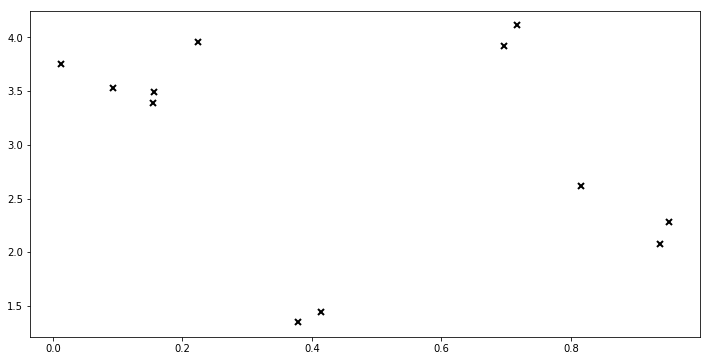

In [68]:
N = 12
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
plt.plot(X, Y, 'kx', mew=2)

In [69]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.models.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01

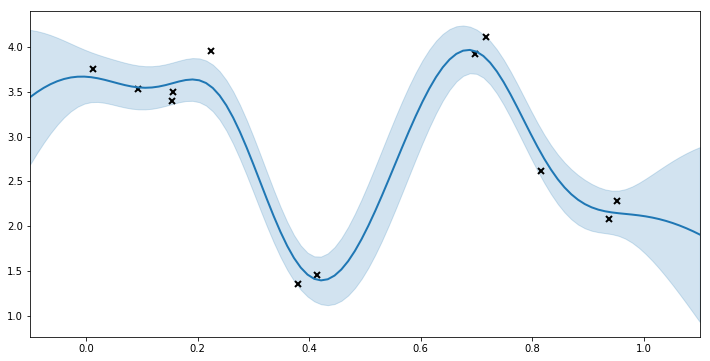

In [85]:
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)#column vector
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)# the points, mew affects the intensity of the colour of the x(shape) points
    plt.plot(xx, mean, 'C0', lw=2)# line
    plt.fill_between(xx[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(-0.1, 1.1)
    
plot(m)

In [86]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
meanf = gpflow.mean_functions.Linear(1.0, 0.0)
m = gpflow.models.GPR(X, Y, k, meanf)
m.likelihood.variance = 0.01

In [88]:
m.as_pandas_table()


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/mean_function/A,Parameter,None,(none),True,"(1, 1)",True,[[1.0]]
GPR/mean_function/b,Parameter,None,(none),True,(),True,0.0
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.3
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 8.583365
  Number of iterations: 21
  Number of functions evaluations: 23


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 8.583365
  Number of iterations: 21
  Number of functions evaluations: 23


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/mean_function/A,Parameter,None,(none),True,"(1, 1)",True,[[-0.982388779971]]
GPR/mean_function/b,Parameter,None,(none),True,(),True,3.424967806815291
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.7188355966927809
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.08262290025369791
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.004129417359098047


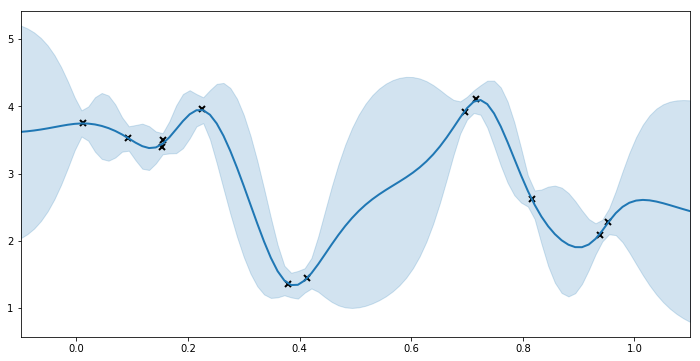

In [89]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [96]:
m.clear()
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m.compile()
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/mean_function/A,Parameter,"N([ 0.],[ 10.])",(none),True,"(1, 1)",True,[[-0.982388779971]]
GPR/mean_function/b,Parameter,"N([ 0.],[ 10.])",(none),True,(),True,3.424967806815291
GPR/kern/variance,Parameter,"Ga([ 1.],[ 1.])",+ve,True,(),True,0.7188355966927809
GPR/kern/lengthscales,Parameter,"Ga([ 1.],[ 1.])",+ve,True,(),True,0.08262290025369791
GPR/likelihood/variance,Parameter,"Ga([ 1.],[ 1.])",+ve,True,(),True,0.004129417359098047


In [97]:
sampler = gpflow.train.HMC()
samples = sampler.sample(m, num_samples=gpflow.test_util.notebook_niter(500), epsilon=0.05, lmin=10, lmax=20, logprobs=False)

Text(0,0.5,'parameter value')

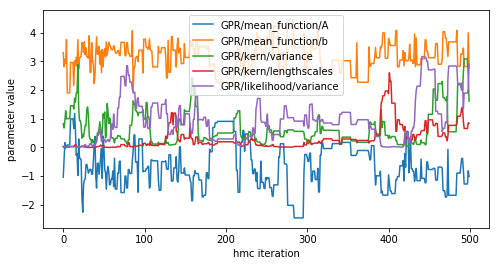

In [100]:
plt.figure(figsize=(8,4))
for i,col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0,0.5,'signal_variance')

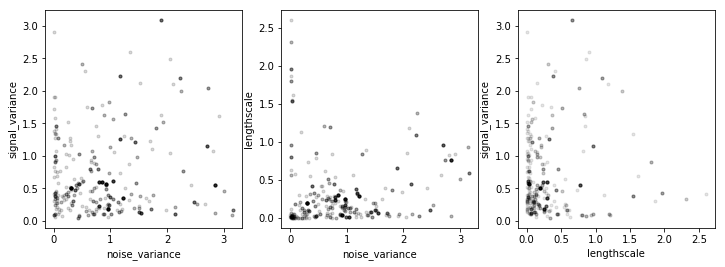

In [101]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples['GPR/kern/lengthscales'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

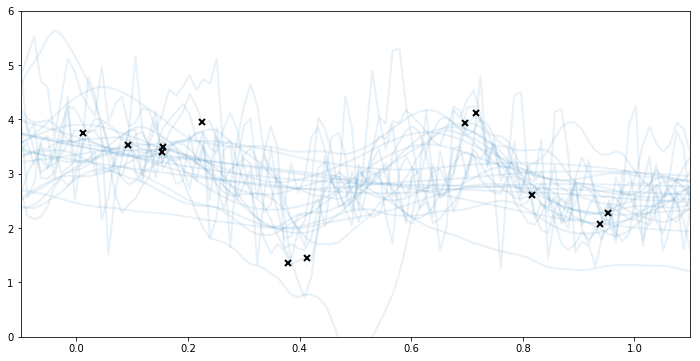

In [102]:
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples.iloc[::20].iterrows():
    f = m.predict_f_samples(xx, 1, initialize=False, feed_dict=m.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(0, 6)

In [ ]:
# dummies example

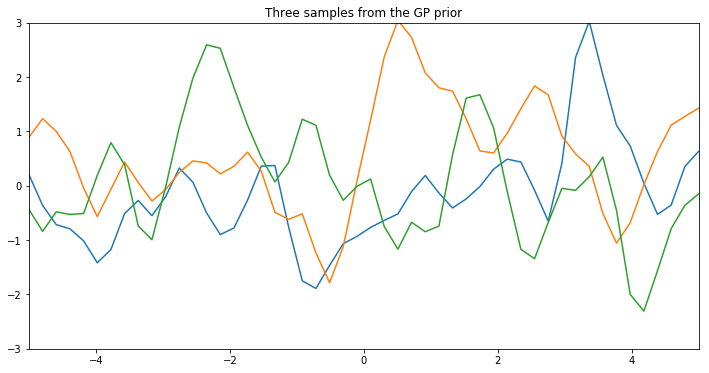

In [103]:
import numpy as np
import matplotlib.pyplot as pl

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()

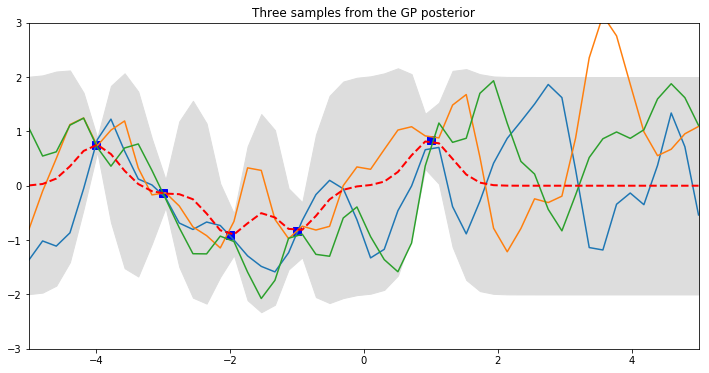

In [109]:
# another example dummies example
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)#
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()